# FOREST-DESERT IMAGE CLASSIFICATION

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

Read file names 

In [2]:
Desert=glob.glob('Desert/*.jpg')
Forest=glob.glob('Forest/*.jpg')

Read image data from all files and store it in a variable, Store the label as well

In [3]:
images=[]
labels=[]
for i in Desert:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)
for i in Forest:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)
    

In [4]:
label_names={1:'Desert',2:'Forest'}

Shuffle images and labels

In [5]:
images,labels=shuffle(images,labels)

Plot some of the images

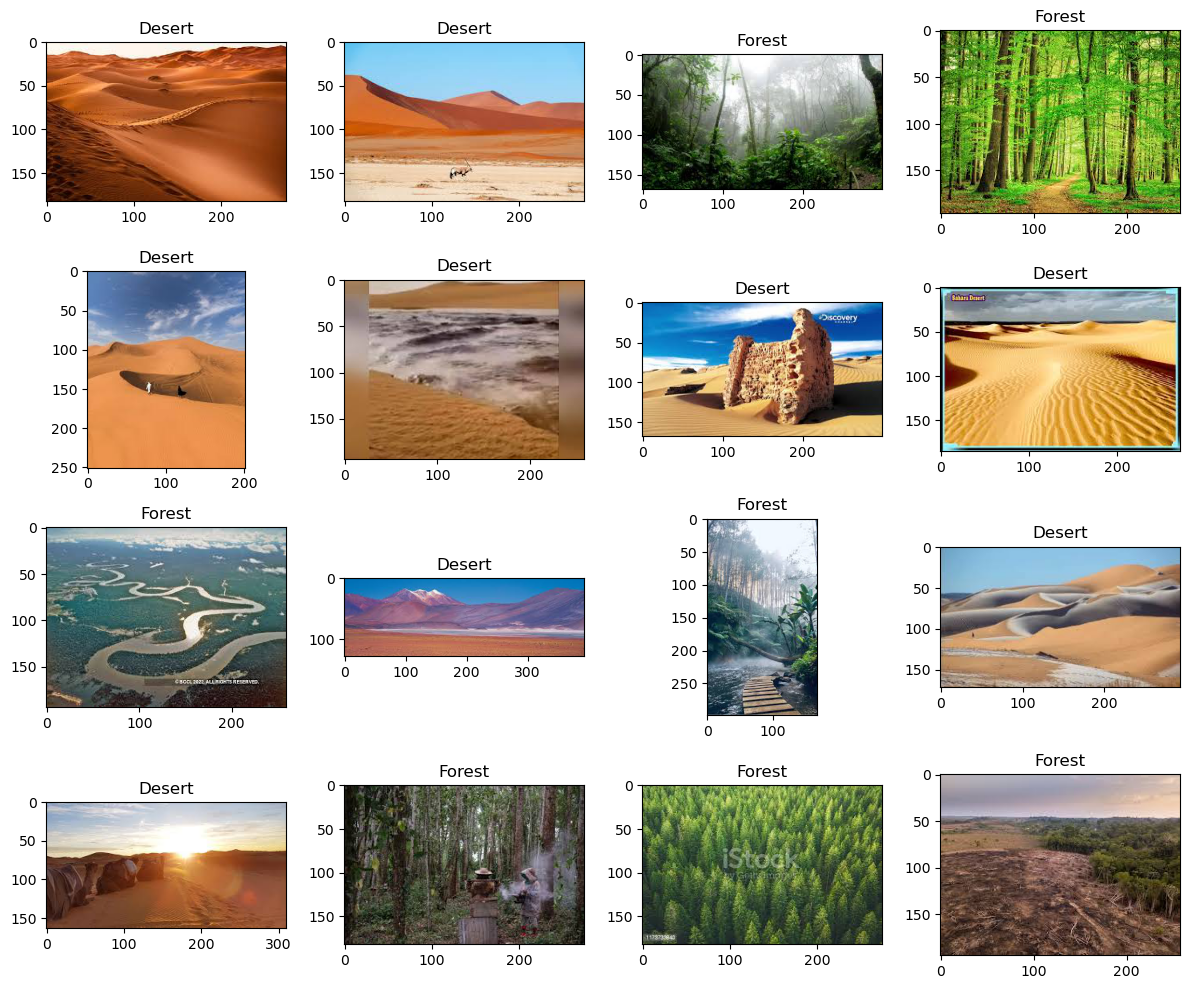

In [6]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(label_names[labels[i]])
plt.tight_layout()

Resize and Plot the images once again

In [7]:
x=[]
for i in images:
    x.append(resize(i,(300,300,3)))
    

In [ ]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x[i])
    plt.title(label_names[labels[i]])
plt.tight_layout()

Convert images and labels to numpy array and store them as x and y variables

In [9]:
x=np.array(x)
y=np.array(labels)


In [10]:
x.shape

(802, 300, 300, 3)

Reshape the images to 1 dimension

In [11]:
d1,d2,d3,d4=x.shape

In [17]:
x=x.reshape((d1,d2*d3*d4))

Train test Split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)


Create SVM Model and train it

In [20]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

Make predictions with X_test

In [21]:
y_pred=model.predict(x_test)

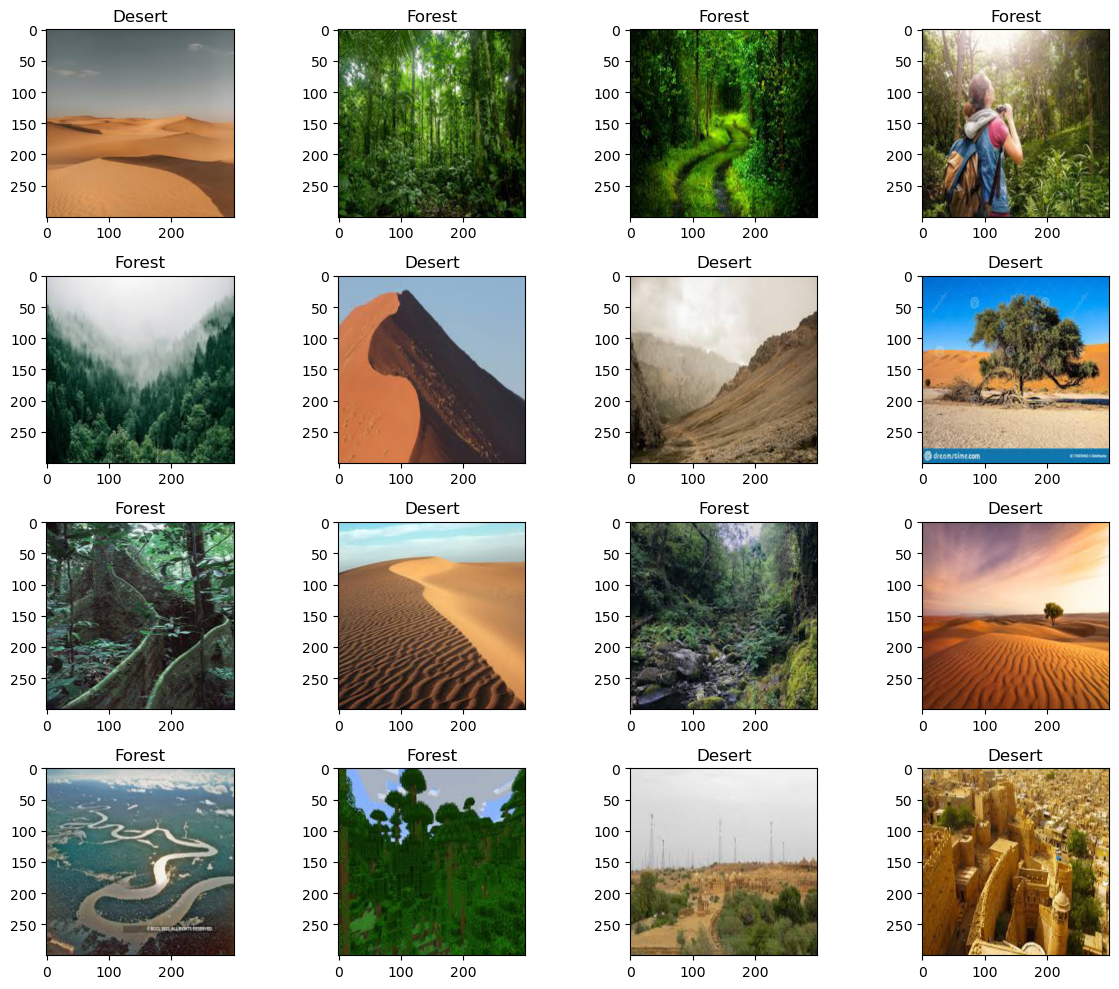

In [22]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].reshape(300,300,3))
    plt.title(label_names[y_pred[i]])
plt.tight_layout()

Model Evaluation

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
accuracy_score(y_test,y_pred)

0.968944099378882

<Axes: >

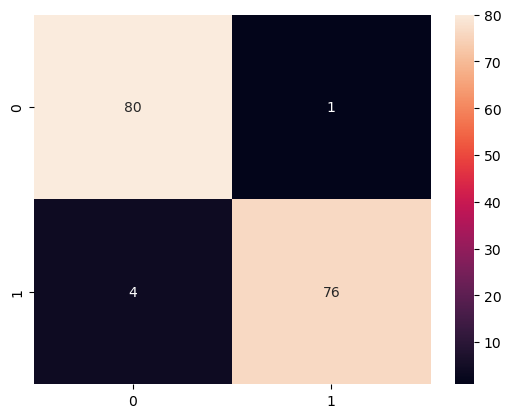

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97        81
           2       0.99      0.95      0.97        80

    accuracy                           0.97       161
   macro avg       0.97      0.97      0.97       161
weighted avg       0.97      0.97      0.97       161

